In [ ]:
import numpy as np
import pandas as pd
import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
!pip install mlflow dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7

In [ ]:
import dagshub
dagshub.init(repo_owner='sanket238', repo_name='zomato-delivery-time-prediction', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=fcbd5372-8345-4015-9119-02ab4f64f79d&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=0019fc4431b9291850583571c26b8d7b486a0d589ed5bc91c617fb3656b3fb0c




Accessing as sanket238

Initialized MLflow to track repo "sanket238/zomato-delivery-time-prediction"

Repository sanket238/zomato-delivery-time-prediction initialized!

In [ ]:
from sklearn import set_config

set_config(transform_output="pandas")

In [ ]:
# load the data

df = pd.read_csv('/content/zomato_dataset.csv')

In [ ]:
df= data_clean_utils.perform_data_cleaning(df)


In [ ]:
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather_conditions,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,Fog,Jam,...,DEH,12,2,saturday,1,15.0,21.0,night,10.280582,long
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,Stormy,High,...,KOC,13,2,sunday,1,10.0,14.0,afternoon,6.242319,medium
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,Sandstorms,Medium,...,PUNE,4,3,friday,0,10.0,17.0,afternoon,13.787860,long
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,Sandstorms,Low,...,LUDH,13,2,sunday,1,10.0,9.0,morning,2.930258,short
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,Fog,Jam,...,KNP,14,2,monday,0,15.0,19.0,evening,19.396618,very_long


In [ ]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather_conditions', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [ ]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,1,15.0,night,10.280582,long
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,1,10.0,afternoon,6.242319,medium
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,0,10.0,afternoon,13.787860,long
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,1,10.0,morning,2.930258,short
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,0,15.0,evening,19.396618,very_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,0,10.0,morning,1.489846,short
45580,21.0,4.6,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,0,15.0,evening,NaN,NaN
45581,30.0,4.9,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,0,15.0,night,4.657195,short
45582,20.0,4.7,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,0,5.0,afternoon,6.232393,medium


In [ ]:
# check for missing values

df.isna().sum()

,0
age,1854
ratings,1908
weather_conditions,578
traffic,563
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1200


In [ ]:
# check for duplicates

df.duplicated().sum()

np.int64(0)

<Axes: >

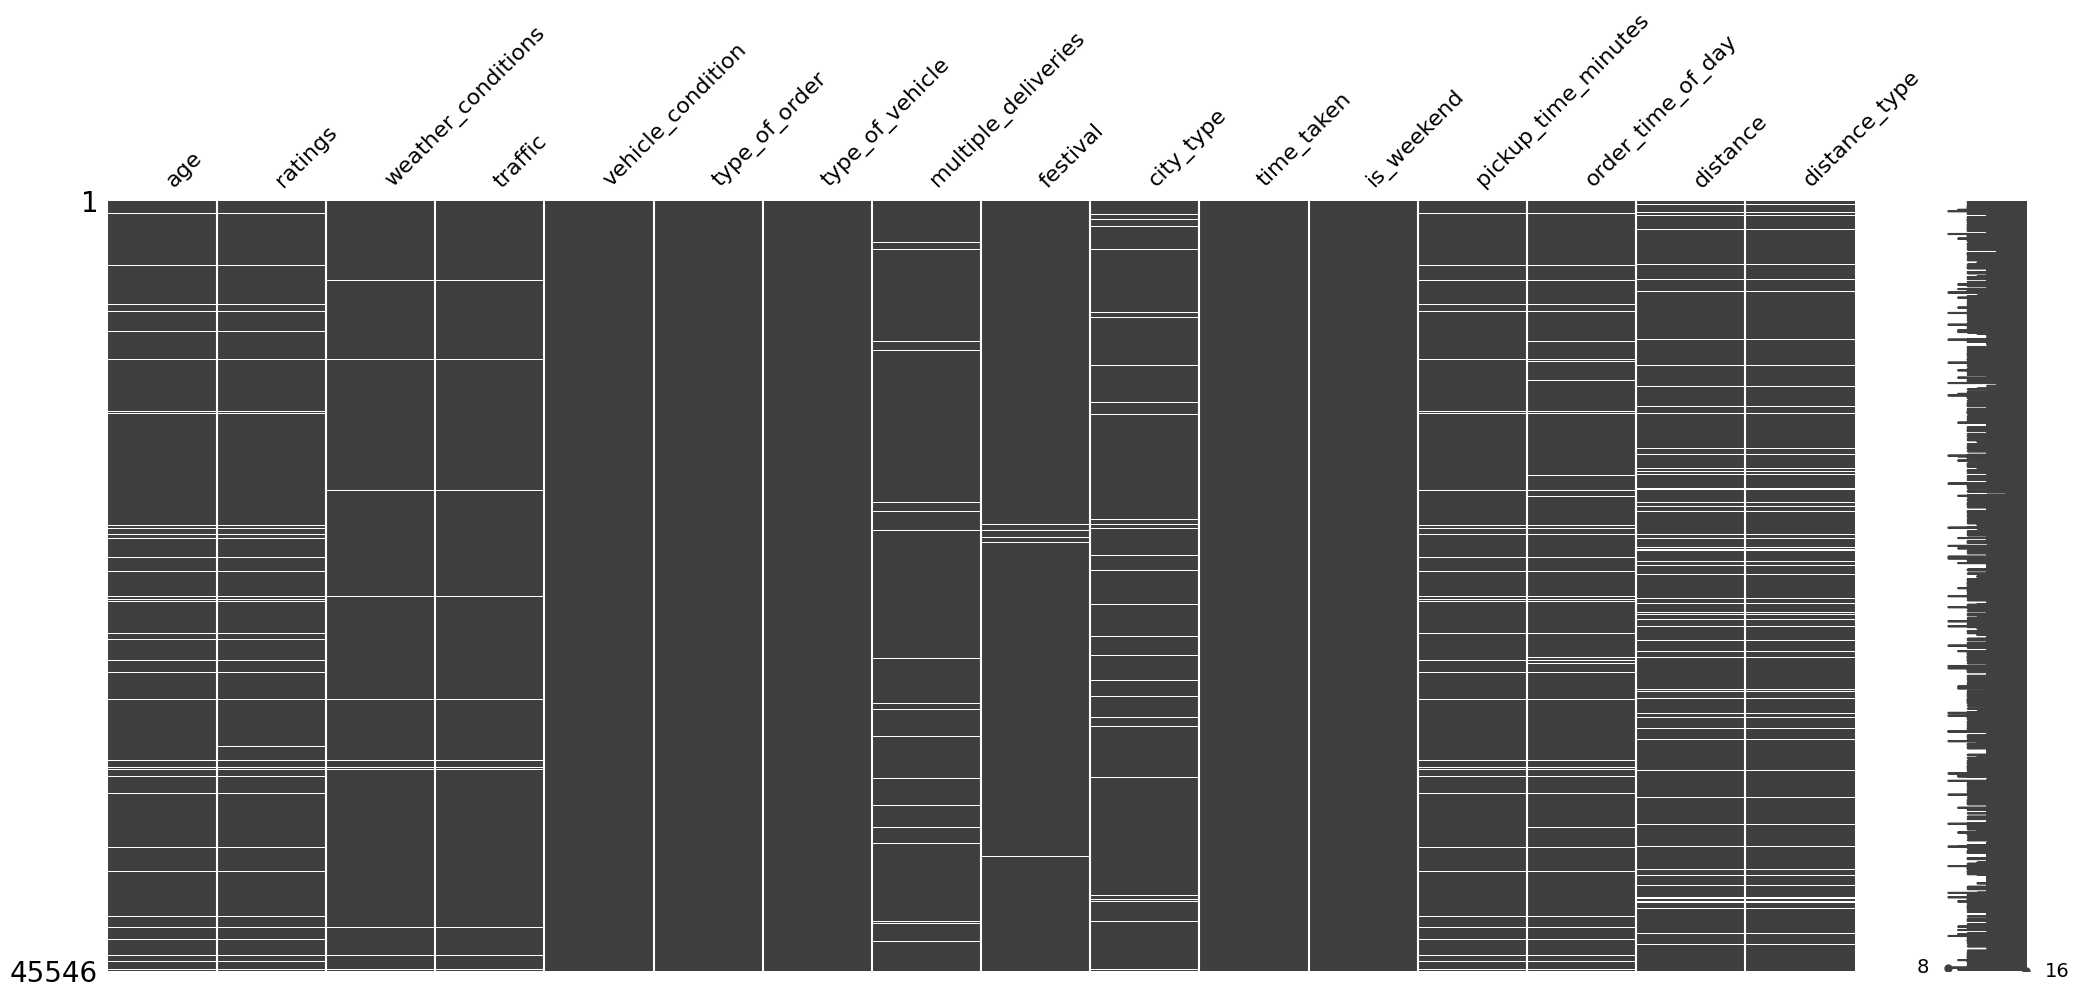

In [ ]:
import missingno as msno

msno.matrix(df)

In [ ]:
# columns that have missing values

missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols


Index(['age', 'ratings', 'weather_conditions', 'traffic',
       'multiple_deliveries', 'festival', 'city_type', 'pickup_time_minutes',
       'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

### Drop Missing Values

In [ ]:
import mlflow

In [ ]:
# set the tracking server

# set the tracking server

mlflow.set_tracking_uri("https://dagshub.com/sanket238/zomato-delivery-time-prediction.mlflow")

In [ ]:
# mlflow experiment

mlflow.set_experiment("Exp 1 - Keep Vs Drop Missing Values")

2025/09/12 03:10:54 INFO mlflow.tracking.fluent: Experiment with name 'Exp 1 - Keep Vs Drop Missing Values' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/9f511ec3415f4f5dbaa653137a0b7907', creation_time=1757646654246, experiment_id='0', last_update_time=1757646654246, lifecycle_stage='active', name='Exp 1 - Keep Vs Drop Missing Values', tags={}>

In [ ]:
temp_df=df.copy().dropna()

In [ ]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,1,15.0,night,10.280582,long
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,1,10.0,afternoon,6.242319,medium
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,0,10.0,afternoon,13.787860,long
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,1,10.0,morning,2.930258,short
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,0,15.0,evening,19.396618,very_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45578,35.0,4.2,Windy,Jam,2,Drinks,motorcycle,1.0,No,Metropolitian,0,10.0,night,16.600272,very_long
45579,30.0,4.8,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,0,10.0,morning,1.489846,short
45581,30.0,4.9,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,0,15.0,night,4.657195,short
45582,20.0,4.7,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,0,5.0,afternoon,6.232393,medium


In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30148, 15)
The shape of test data is (7538, 15)


In [ ]:
y_train

,time_taken
35006,20
39085,33
18288,16
35185,15
1179,21
...,...
20277,41
7602,13
13633,17
1049,30


In [ ]:
# missing data in training data

X_train.isna().sum()


,0
age,0
ratings,0
weather_conditions,0
traffic,0
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
city_type,0


In [ ]:
X_train.columns

Index(['age', 'ratings', 'weather_conditions', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'is_weekend', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [ ]:
len(X_train.columns)


15

In [ ]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather_conditions','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [ ]:
len(num_cols + nominal_cat_cols + ordinal_cat_cols)

13

In [ ]:
for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['Low' 'High' 'Jam' 'Medium']
distance_type ['long', 'medium', 'short', 'very_long']
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']


In [ ]:
# generate order for ordinal encoding

traffic_order = ["Low","Medium","High","Jam"]

distance_type_order = ["short","medium","long","very_long"]

In [ ]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order]), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather_conditions', 'type_of_order',
                                  'type_of_vehicle', 'festival', 'city_type',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['Low', 'Medium',
                                                             'High', 'Jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [ ]:
# transform the data

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans

,age,ratings,pickup_time_minutes,distance,weather_conditions_Fog,weather_conditions_Sandstorms,weather_conditions_Stormy,weather_conditions_Sunny,weather_conditions_Windy,type_of_order_Drinks,...,city_type_Semi-Urban,city_type_Urban,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
35006,0.736842,0.96,0.083333,0.548387,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0.0
39085,0.368421,0.64,0.083333,0.244420,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2,1.0
18288,0.684211,0.88,0.916667,0.080785,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0
35185,0.368421,0.88,0.083333,0.482761,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2,1.0
1179,0.000000,0.92,0.083333,0.163701,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20277,0.631579,0.96,0.083333,0.937993,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0,0.0
7602,0.473684,0.96,0.500000,0.243232,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1.0
13633,0.000000,1.00,0.500000,0.300458,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0
1049,0.000000,0.84,0.083333,0.482007,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,0,1.0


In [ ]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [ ]:
pt.lambdas_

array([0.32353761])

In [ ]:
y_train_pt

,x0
0,-0.653749
1,0.743848
2,-1.201202
3,-1.351480
4,-0.528116
...,...
30143,1.428928
30144,-1.672266
30145,-1.056791
30146,0.458769


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train_trans,y_train_pt.values.ravel())

RandomForestRegressor()

In [ ]:
# get the predictions
y_pred_train = rf.predict(X_train_trans)
y_pred_test = rf.predict(X_test_trans)

In [ ]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.15 minutes
The test error is 3.12 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.98
The test r2 score is 0.82


In [ ]:
# calculate the cross val score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf,X_train_trans,y_train_pt.values.ravel(),cv=5,scoring="r2",n_jobs=-1)

scores

array([0.8088271 , 0.81390028, 0.8033158 , 0.81448003, 0.80752426])

In [ ]:
# mean score

scores.mean()

np.float64(0.8096094934951992)

<Axes: >

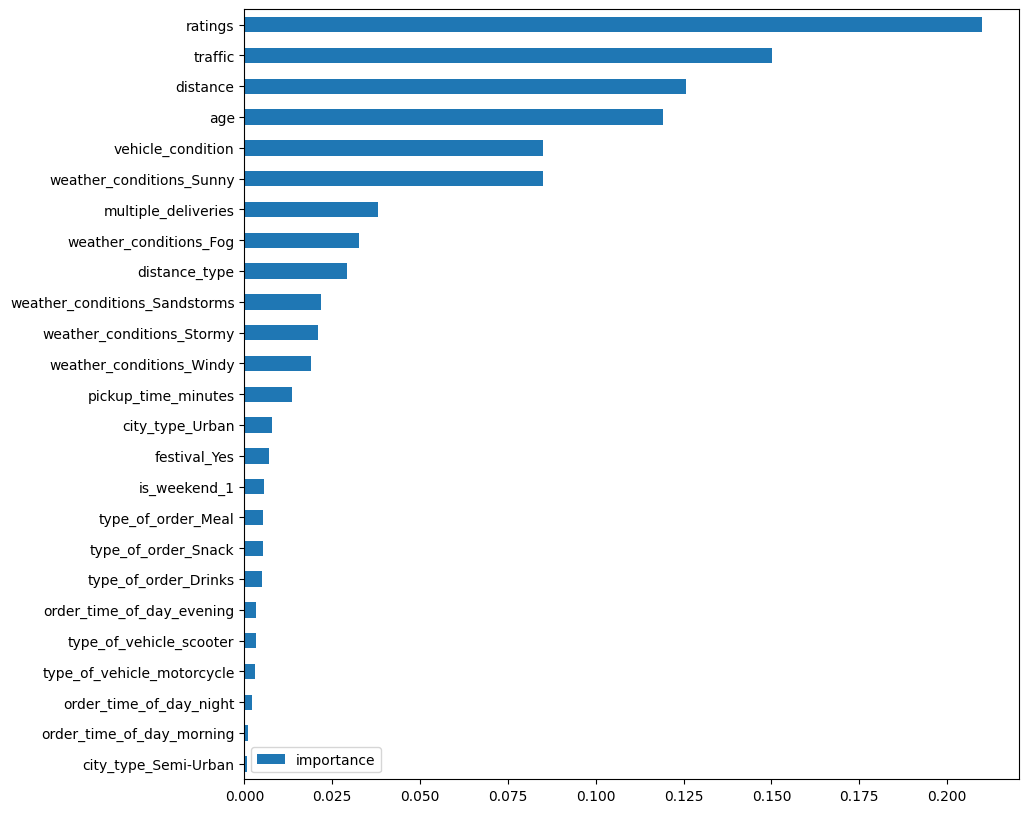

In [ ]:
# feature importance plot

(
    pd.DataFrame(rf.feature_importances_,
             index=X_train_trans.columns,
             columns=["importance"])
    .sort_values(by="importance")
    .plot(kind='barh',figsize=(10,10))
)

In [ ]:
#log the experiment
with mlflow.start_run(run_name="Drop Missing Values"):
    # mlflow log experiment type
    mlflow.log_param("experiment_type","Drop Missing Values")
    # log model params
    mlflow.log_params(rf.get_params())

    # log metrics
    mlflow.log_metric("training_error",mean_absolute_error(y_train,y_pred_train_org))
    mlflow.log_metric("test_error",mean_absolute_error(y_test,y_pred_test_org))
    mlflow.log_metric("training_r2",r2_score(y_train,y_pred_train_org))
    mlflow.log_metric("test_r2",r2_score(y_test,y_pred_test_org))
    mlflow.log_metric("cross_val",scores.mean())

🏃 View run Drop Missing Values at: https://dagshub.com/sanket238/zomato-delivery-time-prediction.mlflow/#/experiments/0/runs/7c26469f5d7e485cace8120989eaea8a
🧪 View experiment at: https://dagshub.com/sanket238/zomato-delivery-time-prediction.mlflow/#/experiments/0


In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
# feature selection using rfecv

rfecv = RFECV(
    estimator=rf,
    step=10,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

In [ ]:
# select features

rfecv.fit(X_train_trans,y_train_pt.values.ravel())

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RFECV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1, scoring='r2', step=10,
      verbose=2)

In [ ]:
# list of selected features

rfecv.get_feature_names_out()

array(['age', 'ratings', 'pickup_time_minutes', 'distance',
       'weather_conditions_Fog', 'weather_conditions_Sandstorms',
       'weather_conditions_Stormy', 'weather_conditions_Sunny',
       'weather_conditions_Windy', 'type_of_order_Drinks',
       'type_of_order_Meal', 'type_of_order_Snack',
       'type_of_vehicle_motorcycle', 'type_of_vehicle_scooter',
       'festival_Yes', 'city_type_Semi-Urban', 'city_type_Urban',
       'is_weekend_1', 'order_time_of_day_evening',
       'order_time_of_day_morning', 'order_time_of_day_night', 'traffic',
       'distance_type', 'vehicle_condition', 'multiple_deliveries'],
      dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(rfecv.transform(X_train_trans),y_train_pt.values.ravel())

RandomForestRegressor()

In [ ]:
# get the predictions
y_pred_train = rf.predict(rfecv.transform(X_train_trans))
y_pred_test = rf.predict(rfecv.transform(X_test_trans))

In [ ]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.15 minutes
The test error is 3.11 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.98
The test r2 score is 0.82


In [ ]:
# calculate the cross val score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf,rfecv.transform(X_train_trans),y_train_pt.values.ravel(),cv=5,scoring="r2",n_jobs=-1)

scores

array([0.8081068 , 0.81313395, 0.80197678, 0.81497427, 0.80645309])

In [ ]:
# mean score

scores.mean()

np.float64(0.8089289794366076)

In [ ]:
rf.feature_importances_

array([0.1188622 , 0.21041496, 0.01357865, 0.12955173, 0.03287321,
       0.02163396, 0.02159466, 0.08447074, 0.01885813, 0.00505583,
       0.0053565 , 0.00523234, 0.0030659 , 0.00324719, 0.00700516,
       0.00079211, 0.0079252 , 0.00561939, 0.00330109, 0.00111592,
       0.00219507, 0.15080704, 0.02519517, 0.08511616, 0.03713168])

<Axes: >

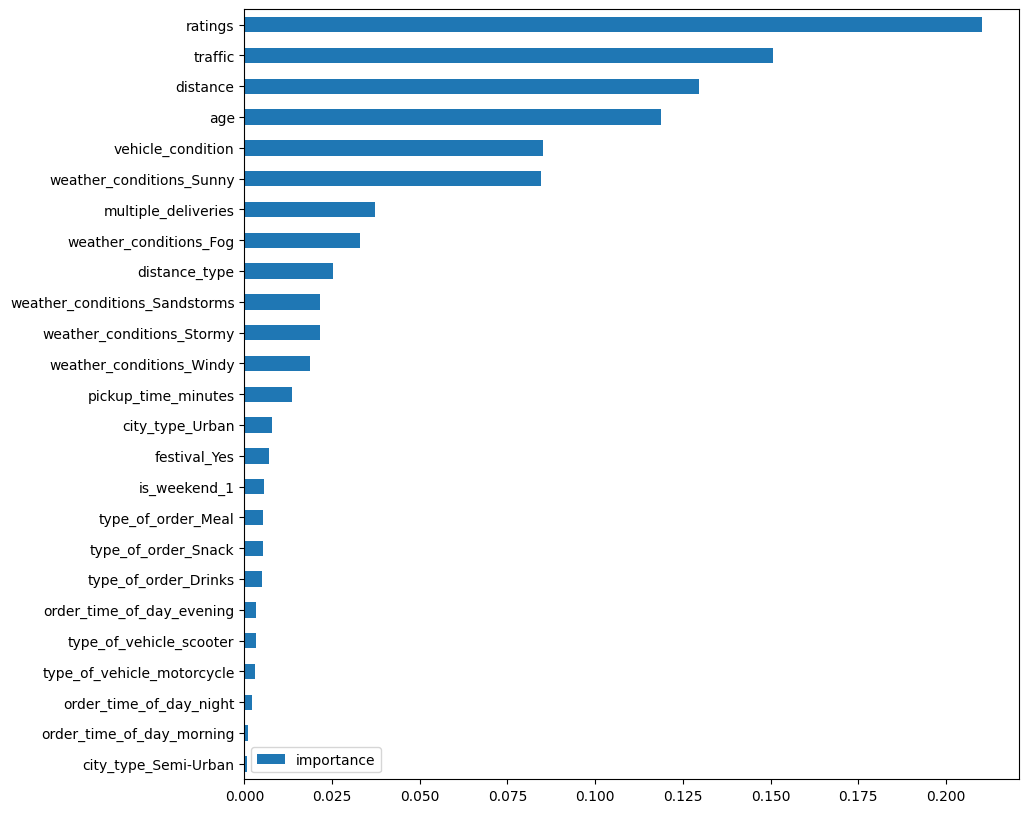

In [ ]:
# feature importance plot

(
    pd.DataFrame(rf.feature_importances_,
             index=rfecv.transform(X_train_trans).columns,
             columns=["importance"])
    .sort_values(by="importance")
    .plot(kind='barh',figsize=(10,10))
)

### Impute Missing Values

In [ ]:
temp_df = df.copy()

In [ ]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,1,15.0,night,10.280582,long
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,1,10.0,afternoon,6.242319,medium
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,0,10.0,afternoon,13.787860,long
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,1,10.0,morning,2.930258,short
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,0,15.0,evening,19.396618,very_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,0,10.0,morning,1.489846,short
45580,21.0,4.6,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,0,15.0,evening,NaN,NaN
45581,30.0,4.9,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,0,15.0,night,4.657195,short
45582,20.0,4.7,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,0,5.0,afternoon,6.232393,medium


In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (36436, 15)
The shape of test data is (9110, 15)


In [ ]:
# missing values in train data

X_train.isna().sum()

,0
age,1496
ratings,1538
weather_conditions,462
traffic,450
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,792
festival,183
city_type,943


In [ ]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [ ]:
missing_cols

Index(['age', 'ratings', 'weather_conditions', 'traffic',
       'multiple_deliveries', 'festival', 'city_type', 'pickup_time_minutes',
       'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [ ]:
# percentage of rows in data having missing values

(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)

np.float64(17.0)

### Imputation Pipeline

In [ ]:
nominal_cat_cols

['weather_conditions',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'is_weekend',
 'order_time_of_day']

In [ ]:
X_train.isna().sum()

,0
age,1496
ratings,1538
weather_conditions,462
traffic,450
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,792
festival,183
city_type,943


In [ ]:
# features to fill values with mode

features_to_fill_mode = ['multiple_deliveries','festival','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

features_to_fill_missing

['weather_conditions',
 'type_of_order',
 'type_of_vehicle',
 'is_weekend',
 'order_time_of_day']

In [ ]:
# simple imputer to fill categorical vars with mode

simple_imputer = ColumnTransformer(transformers=[
    ("mode_imputer",SimpleImputer(strategy="most_frequent"),features_to_fill_mode),
    ("missing_imputer",SimpleImputer(strategy="constant",fill_value="missing"),features_to_fill_missing)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather_conditions', 'type_of_order',
                                  'type_of_vehicle', 'is_weekend',
                                  'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [ ]:
simple_imputer.fit_transform(X_train)

,multiple_deliveries,festival,city_type,weather_conditions,type_of_order,type_of_vehicle,is_weekend,order_time_of_day,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance,distance_type
40699,0.0,No,Metropolitian,Sandstorms,Snack,scooter,0,night,37.0,5.0,Low,1,5.0,12.483922,long
11911,1.0,No,Metropolitian,Cloudy,Buffet,scooter,1,evening,34.0,4.6,Medium,2,5.0,9.313692,medium
2409,1.0,No,Urban,Cloudy,Meal,scooter,1,morning,30.0,4.7,Low,2,10.0,3.058925,short
38039,1.0,No,Metropolitian,Stormy,Snack,scooter,0,night,21.0,4.5,Low,1,15.0,16.982277,very_long
342,1.0,No,Metropolitian,Windy,Meal,electric_scooter,0,afternoon,33.0,3.9,Medium,2,5.0,13.612594,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,1.0,No,Metropolitian,Cloudy,Meal,electric_scooter,0,evening,35.0,4.8,Medium,2,10.0,NaN,NaN
44769,1.0,No,Urban,Sunny,Drinks,scooter,0,night,28.0,4.8,Jam,1,5.0,4.528282,short
38190,1.0,No,Urban,Sunny,Buffet,motorcycle,1,morning,27.0,4.7,Low,0,5.0,1.536864,short
860,1.0,No,Metropolitian,Stormy,Buffet,motorcycle,1,afternoon,27.0,4.4,Medium,0,5.0,10.707860,long


In [ ]:
simple_imputer.fit_transform(X_train).isna().sum()

,0
multiple_deliveries,0
festival,0
city_type,0
weather_conditions,0
type_of_order,0
type_of_vehicle,0
is_weekend,0
order_time_of_day,0
age,1496
ratings,1538


In [ ]:
# knn imputer

knn_imputer = KNNImputer(n_neighbors=5)

In [ ]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather_conditions','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [ ]:
# generate order for ordinal encoding

traffic_order = ["Low","Medium","High","Jam"]

distance_type_order = ["short","medium","long","very_long"]

In [ ]:
# unique categories the ordinal columns

for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['Low' 'Medium' 'Jam' 'High' nan]
distance_type ['long', 'medium', 'short', 'very_long', NaN]
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']


In [ ]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather_conditions', 'type_of_order',
                                  'type_of_vehicle', 'festival', 'city_type',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['Low', 'Medium',
                                                             'High', 'Jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [ ]:
preprocessor.fit_transform(X_train)

,age,ratings,pickup_time_minutes,distance,weather_conditions_Fog,weather_conditions_Sandstorms,weather_conditions_Stormy,weather_conditions_Sunny,weather_conditions_Windy,weather_conditions_nan,...,city_type_nan,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,order_time_of_day_nan,traffic,distance_type,vehicle_condition,multiple_deliveries
40699,0.566667,0.714286,0.083333,0.564941,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0.0
11911,0.466667,0.600000,0.083333,0.402402,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2,1.0
2409,0.333333,0.628571,0.500000,0.081718,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1.0
38039,0.033333,0.571429,0.916667,0.795574,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1,1.0
342,0.433333,0.400000,0.083333,0.622809,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,0.500000,0.657143,0.500000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,2,1.0
44769,0.266667,0.657143,0.083333,0.157052,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1,1.0
38190,0.233333,0.628571,0.083333,0.003681,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0
860,0.233333,0.542857,0.083333,0.473882,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0,1.0


In [ ]:
preprocessor.fit_transform(X_train).isna().sum().loc[lambda ser : ser.ge(1)]

,0
age,1496
ratings,1538
pickup_time_minutes,1359
distance,2943
multiple_deliveries,792


In [ ]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor),
                                ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather_conditions',
                                                   'type_of_order',
                                                   't...
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High',
                                                                              'Jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [ ]:
model_pipe = Pipeline(steps=[
                                ("preprocessing",processing_pipeline),
                                ("model",rf)
                            ])

model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [ ]:
# fit the pipeline on data

model_pipe.fit(X_train,y_train_pt.values.ravel())

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [ ]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [ ]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.23 minutes
The test error is 3.29 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.97
The test r2 score is 0.80


In [ ]:
# calculate the cross val score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_pipe,X_train,y_train_pt.values.ravel(),cv=5,scoring="r2",n_jobs=-1)

scores

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


array([0.78609531, 0.77764028, 0.77480645, 0.78131864, 0.77089392])

In [ ]:
# mean score

scores.mean()

np.float64(0.7781509184941784)

In [ ]:
# log experiment

with mlflow.start_run(run_name="Impute Missing Values"):
    # mlflow log experiment type
    mlflow.log_param("experiment_type","Impute Missing Values")
    # log model params
    mlflow.log_params(rf.get_params())

    # log metrics
    mlflow.log_metric("training_error",mean_absolute_error(y_train,y_pred_train_org))
    mlflow.log_metric("test_error",mean_absolute_error(y_test,y_pred_test_org))
    mlflow.log_metric("training_r2",r2_score(y_train,y_pred_train_org))
    mlflow.log_metric("test_r2",r2_score(y_test,y_pred_test_org))
    mlflow.log_metric("cross_val",scores.mean())

🏃 View run Impute Missing Values at: https://dagshub.com/sanket238/zomato-delivery-time-prediction.mlflow/#/experiments/0/runs/65a9d764a870429ea36c44b42bafb883
🧪 View experiment at: https://dagshub.com/sanket238/zomato-delivery-time-prediction.mlflow/#/experiments/0
